In [5]:
ls

Preprocess.ipynb  README.md  data/  requirements.txt


In [4]:
import os
import mne
import shutil
import requests
import pandas as pd

In [10]:
#os.chdir("42_Total_perspective_vortex")

if not os.path.exists('data'):
    os.makedirs('data')

In [12]:
# URL del archivo a descargar
url = "https://physionet.org/files/eegmmidb/1.0.0/S001/S001R01.edf?download"
local_filename = "data/S001R01.edf"

response = requests.get(url, stream=True)

if response.status_code == 200:
    with open(local_filename, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:
                file.write(chunk)
    print(f"Archivo descargado correctamente como {local_filename}")
else:
    print(f"Error en la descarga. Status code: {response.status_code}")


Descargando archivo...
Archivo descargado correctamente como data/S001R01.edf


Extracting EDF parameters from /home/studio-lab-user/42_Total_perspective_vortex/data/S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...
<RawEDF | S001R01.edf, 64 x 9760 (61.0 s), ~4.8 MB, data loaded>
Using matplotlib as 2D backend.


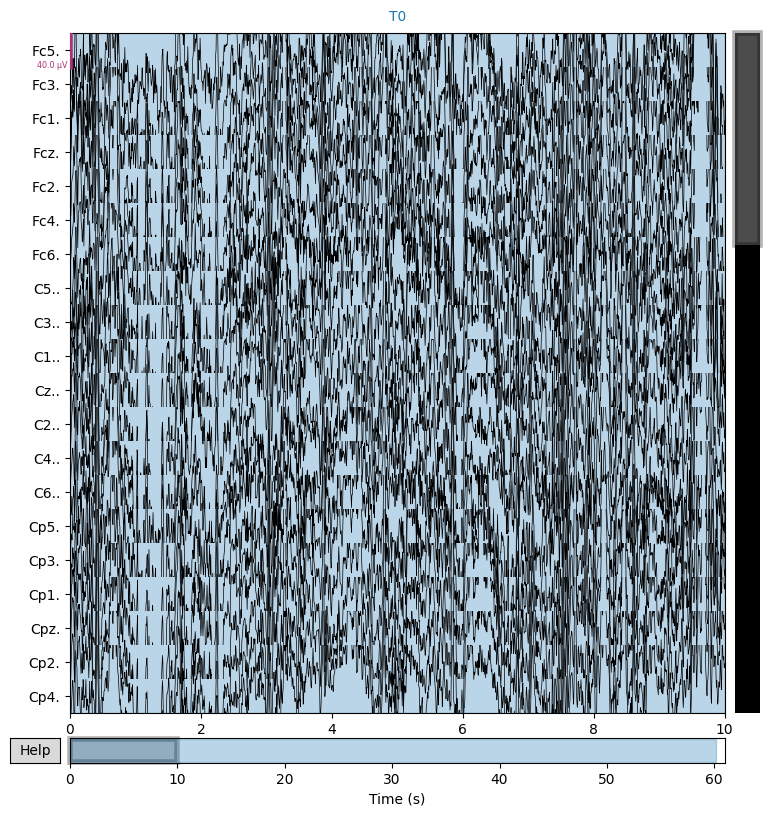

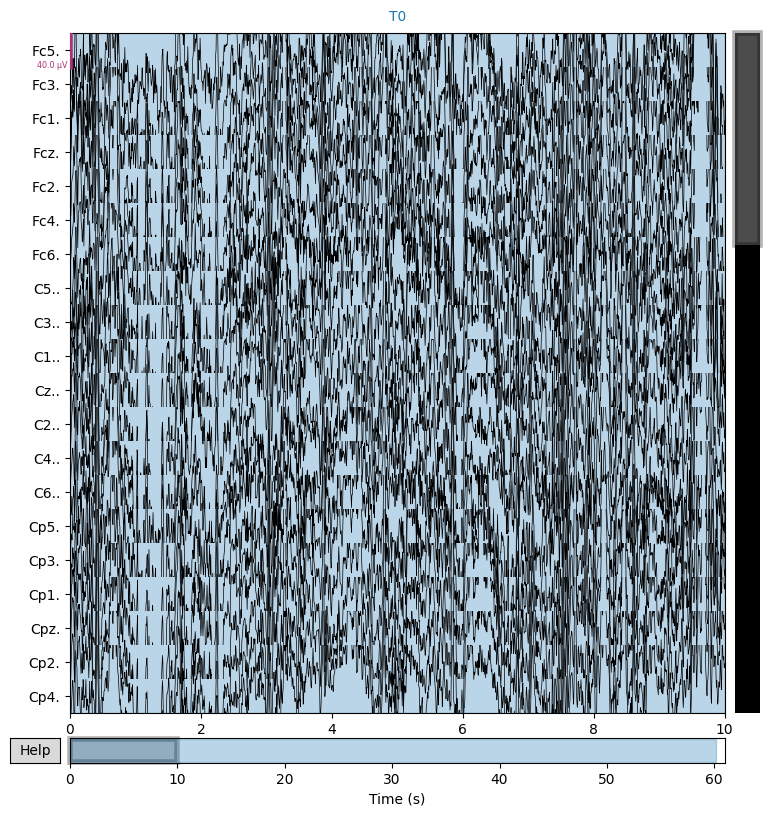

In [13]:
path = "data/S001R01.edf"
raw_data = mne.io.read_raw_edf(path, preload=True)
print(raw_data)
raw_data.plot()